In [487]:
#import modules for the analysis environment
import os
import matplotlib.pyplot as plta
import matplotlib as plt
import pandas as pd
import numpy as np
import requests
import datetime
import ast
import gmaps
import datetime
# from config import gkey

#read cleaned csv file
df = pd.read_csv("Data/clean_data/clean_data.csv")
df.head()

,date,time,area,district,victim_age,victim_sex,victim_race,premise,address,location
0,07/06/2019,2355,N Hollywood,1591,99.0,Male,Unknown,STREET,GOODLAND AV,"(34.1371, -118.4062)"
1,07/06/2019,500,Foothill,1677,45.0,Male,White,STREET,GLENOAKS BL,"(34.2249, -118.3617)"
2,07/06/2019,1130,West Valley,1028,25.0,Male,Asian,STREET,SHERMAN WY,"(34.2012, -118.4989)"
3,07/06/2019,1415,Northeast,1153,29.0,Male,Unknown,STREET,LOS FELIZ BL,"(34.1081, -118.3078)"
4,07/06/2019,1230,Central,192,41.0,Male,Unknown,STREET,GRAND AV,"(34.0384, -118.2646)"


In [488]:
# Create DataFrame with the total counts of each ethnicity
victim_race_counts = pd.DataFrame(df['victim_race'].value_counts())
victim_race_counts

,victim_race
Hispanic,156131
White,101618
Unknown,60669
Black,58343
Asian,23383
Pacific Islander,442
American Indian,135


In [489]:
# Remove Unknown victims from DataFrame
updated_victim_race = victim_race_counts.loc[['Hispanic','White','Black',
                                              'Asian','Pacific Islander','American Indian'],
                                             ['victim_race']]
updated_victim_race

,victim_race
Hispanic,156131
White,101618
Black,58343
Asian,23383
Pacific Islander,442
American Indian,135


In [490]:
#Calculate the percentage of total crashes per ethinicity 
percent_victim_race = updated_victim_race["victim_race"]/updated_victim_race["victim_race"].sum()*100

# Add a new colum display the calculated percentage
updated_victim_race["crash_population"] = percent_victim_race
updated_victim_race

,victim_race,crash_population
Hispanic,156131,45.913860
White,101618,29.883077
Black,58343,17.157082
Asian,23383,6.876301
Pacific Islander,442,0.129980
American Indian,135,0.039700


In [491]:
# Display only the percentage of crashes per ethnicity
pct_race_df = pd.DataFrame(updated_victim_race["crash_population"])

# Format percentage calculations with two digits and percentage sign
# pct_race_df.style.format({"crash_population":"{:,.2f}%"})
pct_race_df

,crash_population
Hispanic,45.913860
White,29.883077
Black,17.157082
Asian,6.876301
Pacific Islander,0.129980
American Indian,0.039700


LA Population Composition by race
>- Hispanic: 48.2%
- White (non-hispanic): 28.5%
- Black: 9.0%
- Asian: 11.6%
- Pacific Islander: 0.2%
- American Indian: 0.4%
- Other: 0.6%

src: https://statisticalatlas.com/place/California/Los-Angeles/Race-and-Ethnicity 

In [492]:
ethn_dict = {"Hispanic":"48.2", 
             "White":"28.5", 
             "Black":"9.0", 
             "Asian":"11.6", 
             "Pacific Islander":"0.2", 
             "American Indian":"0.4"}

pct_race_df["LA_Population"] = pd.Series(ethn_dict)
multibar = pct_race_df.style.format({"crash_population":"{:,.2f}"})
multibar

,crash_population,LA_Population
Hispanic,45.91,48.2
White,29.88,28.5
Black,17.16,9.0
Asian,6.88,11.6
Pacific Islander,0.13,0.2
American Indian,0.04,0.4


AttributeError: module 'matplotlib.pyplot' has no attribute 'yaxis'

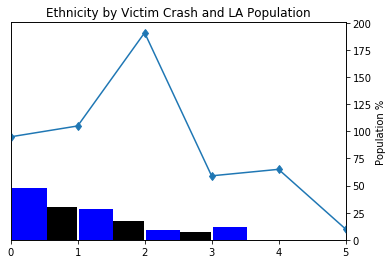

In [486]:
test_df = pd.DataFrame({"ratio" : [95, 105, 191, 59, 65, 10]})

test_df["ratio"].plot(kind="line", marker="d", secondary_y=True)

xaxis = ("H", "W", "B", "A", "P", "I")
crash_pop = (45.91, 29.88, 17.16, 6.88, 0.13, .04)
la_pop = (48.2, 28.5, 9, 11.6, .2, .4)

ind = np.arange(len(xaxis))
width = .55

plta.bar(ind - width/2, crash_pop, width=.52, color="black", label="Crash Population")
plta.bar(ind + width/2, la_pop, width=.52, color="b", label="LA Population")

plta.title("Ethnicity by Victim Crash and LA Population")
plta.ylabel("Population %")
plta.yaxis(tick_right())
plta.yaxis(tick_left())
plta.legend(loc="best")
plta.xticks(ind + width/20, ("Hispanic", "White", "Black", "Asian", "Pacific Islander", "American Indian"), rotation = 40)

plta.spines['right'].set_visible(False)
plta.spines['top'].set_visible(False)
plta.spines['left'].set_visible(False)
plta.show()


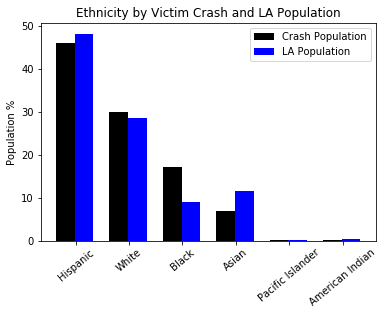

In [496]:
xaxis = ("H", "W", "B", "A", "P", "I")
crash_pop = (45.91, 29.88, 17.16, 6.88, 0.13, .04)
la_pop = (48.2, 28.5, 9, 11.6, .2, .4)

ind = np.arange(len(xaxis))
width = 0.35

plta.bar(ind - width/2, crash_pop, width, color="black", label="Crash Population")
plta.bar(ind + width/2, la_pop, width, color="b", label="LA Population")

plta.title("Ethnicity by Victim Crash and LA Population")
plta.ylabel("Population %")

plta.xticks(ind + width/20, ("Hispanic", "White", "Black", "Asian", "Pacific Islander", "American Indian"), rotation = 40)
plta.legend(loc="best")

plta.show()


## Age mean per Ethnicity